In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


def f(w1, w2):
    return (w1**2 + w2-11)**2 + (w2**2 + w1 - 7)**2

delta = 1/10000
g1 = lambda w1,w2: (f(w1,w2) - f(w1+delta, w2))/(-1*delta)
g2 = lambda w1,w2: (f(w1,w2) - f(w1,w2+delta))/(-1*delta)


def gradDescent(w, stepSize):
    w1 = w[0]
    w2 = w[1]
    ctr = 1
    d = 1/10000
    ctr = 1
    grad1 = (f(w1,w2) - f(w1+d, w2))/(-1*d)
    grad2 = (f(w1,w2) - f(w1,w2+d))/(-1*d)
    grad = [grad1,grad2]
    while(ctr <= 10000 and np.linalg.norm(grad) > 10**(-12)):
        if ctr == 10000:
            return w, ctr
        w1 = w1 - (stepSize*grad1)
        w2 = w2 - (stepSize*grad2)
        grad1 = (f(w1,w2) - f(w1+d, w2))/(-1*d)
        grad2 = (f(w1,w2) - f(w1,w2+d))/(-1*d)
        grad = [grad1, grad2]
        ctr += 1
        
    return [w1,w2], ctr

In [2]:
w = [0, -4]
stepSize = .0005
start = time.time()
wStar, ctr = gradDescent(w,stepSize)
end = time.time()
elapsed = end - start
print('For ', w, ' with step size' , stepSize)
print('w* = ', wStar, 'after', ctr,'iterations in', elapsed, 'seconds')

For  [0, -4]  with step size 0.0005
w* =  [-3.7793776445190477, -3.283257567459236] after 1063 iterations in 0.015345573425292969 seconds


In [3]:
w = [0, -4]
stepSize = .01
start = time.time()
wStar, ctr = gradDescent(w,stepSize)
end = time.time()
elapsed = end - start
print('For ', w, ' with step size' , stepSize)
print('w* = ', wStar, 'after', ctr,'iterations in', elapsed, 'seconds')

For  [0, -4]  with step size 0.01
w* =  [-3.779377644519052, -3.2832575674592426] after 39 iterations in 0.0005135536193847656 seconds


Based on the previous 2 chosen step sizes, the amount of time (and iterations) seem to decrease as step size increases. However, since there is the possibility of over stepping and choosing a step size that causes the gradient descent to fail, we use the following below to see how the step size compares with time.

Text(0,0.5,'Elapsed time in seconds')

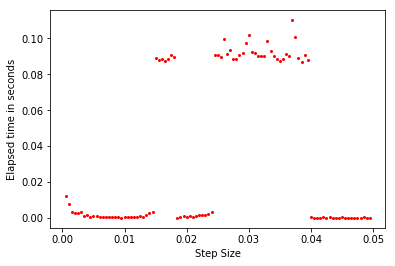

In [4]:
times = []
iterations = []
x = [i*.0005 for i in range(1,100)]
for i in x:
    start = time.time()
    wStar, ctr = gradDescent(w,i)
    end = time.time()
    times.append(end - start)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, times, 'ro',markersize = 2)
ax.set_xlabel('Step Size')
ax.set_ylabel('Elapsed time in seconds')

As such, we have that the time does decrease for the most part as step size increases (until a certain limit). There also exists some step sizes that cause the gradient descent to fail or choose points that move past the desired minimum.

In [5]:
stepSize = .01
wVec = [[0,-4],[.5, -4],[0,4],[.5,4]]
for w in wVec:
    wStar, ctr = gradDescent(w,stepSize)
    print('For ', w, ' with step size' , stepSize)
    print('w* = ', wStar)

For  [0, -4]  with step size 0.01
w* =  [-3.779377644519052, -3.2832575674592426]
For  [0.5, -4]  with step size 0.01
w* =  [3.5843809093822654, -1.848165292813596]
For  [0, 4]  with step size 0.01
w* =  [-2.8051670980977117, 3.1312633127795917]
For  [0.5, 4]  with step size 0.01
w* =  [2.999956616071349, 1.9999755189296589]


Since the minima found with the initial w's are different, it is apparent that the w* found by each are not necessarily the global minima and could all be local minima. Since all the minima found are different, at least 3 of the above minima are local minima.

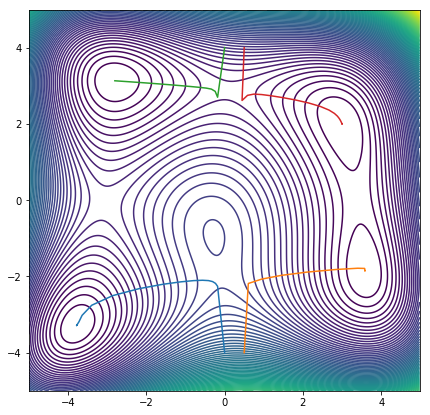

In [6]:
def gradDescent2(w, stepSize):
    w1 = w[0]
    w2 = w[1]
    ctr = 1
    d = 1/10000
    ctr = 1
    grad1 = (f(w1,w2) - f(w1+d, w2))/(-1*d)
    grad2 = (f(w1,w2) - f(w1,w2+d))/(-1*d)
    grad = [grad1,grad2]
    wList = [w]
    while(ctr <= 10000 and np.linalg.norm(grad) > 10**(-12)):
        if ctr == 10000:
            return wList
        w1 = w1 - (stepSize*grad1)
        w2 = w2 - (stepSize*grad2)
        wList.append([w1,w2])
        grad1 = (f(w1,w2) - f(w1+d, w2))/(-1*d)
        grad2 = (f(w1,w2) - f(w1,w2+d))/(-1*d)
        grad = [grad1, grad2]
        ctr += 1
        
    return wList


x = np.arange(-5, 5, .02)
y = np.arange(-5, 5, .02)
z = np.zeros((x.size,y.size))
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = f(y[j],x[i])
        

fig, ax = plt.subplots(1, 1,figsize = (7,7))
ax = plt.contour(x,y,z,99)
stepSize = .01
wVec = [[0,-4],[.5, -4],[0,4],[.5,4]]
for w in wVec:
    wList = gradDescent2(w,stepSize)
    x = []
    y = []
    for coords in wList:
        x.append(coords[0])
        y.append(coords[1])
    plt.plot(x,y)

# Parameter Estimation

In [9]:
from scipy.stats import multivariate_normal as mnorm

mean = [-1,0,4,1,.5]
id5 = np.eye(5)
cov = np.multiply(id5, 2)
Nvec = np.power(10,[1,2,3,4,5,6])
meanNVec = []
instError = []
for N in Nvec:
    temp = mnorm.rvs(mean, cov, N)
    meanN = sum(temp)/N
    meanNVec.append(meanN)
    instError.append(np.linalg.norm(meanN - mean)**2)

for i in range(0,Nvec.size):
    print('For N = ',Nvec[i])
    print('Estimated mean vector: ', meanNVec[i])
    print('Instantaneous error: ',instError[i])

For N =  10
Estimated mean vector:  [-0.98268927 -0.2356731   4.02812604  1.40003733  0.44059945]
Instantaneous error:  0.2201908368213957
For N =  100
Estimated mean vector:  [-7.95115106e-01 -1.74196975e-03  3.81940658e+00  9.15276993e-01
  3.53220166e-01]
Instantaneous error:  0.10331714497107057
For N =  1000
Estimated mean vector:  [-0.97966259  0.02265568  3.99172362  1.03193868  0.49673465]
Instantaneous error:  0.0020261302563979915
For N =  10000
Estimated mean vector:  [-0.99767129 -0.01257813  4.00171445  1.00591916  0.50548832]
Instantaneous error:  0.0002317297781387811
For N =  100000
Estimated mean vector:  [-9.95441525e-01 -1.74286538e-03  4.00270060e+00  9.99529859e-01
  5.05125599e-01]
Instantaneous error:  5.7603319543525826e-05
For N =  1000000
Estimated mean vector:  [-9.99221811e-01  2.34424849e-05  3.99903048e+00  9.99505730e-01
  5.01469311e-01]
Instantaneous error:  3.949268846383359e-06


Text(0.5,0,'log(N)')

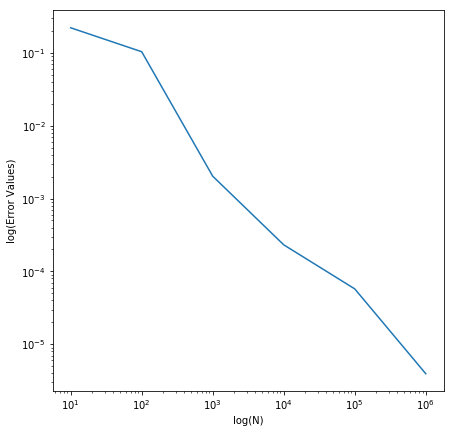

In [10]:
fig, ax = plt.subplots(1, 1,figsize = (7,7))
plt.loglog(Nvec, instError)
ax.set_ylabel("log(Error Values)")
ax.set_xlabel("log(N)")

On a log-log plot, the relationship seems to be linear. There are some slight deviations due to it being a random vector. Since it is linear with a negative slope in log-log, the relationship between $N$ and $e_N$ will be of $e_N = c_1 N^m + c_2$ with $m$ being the slope of the log-log plot for some initial conditions $c_1$ and $c_2$